In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import shap


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dt = pd.read_csv('./heart.csv')

In [3]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [4]:
dt.head(10)

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   
5   57    1                0                     140          192   
6   56    0                1                     140          294   
7   44    1                1                     120          263   
8   52    1                2                     172          199   
9   57    1                2                     150          168   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   
5                    0         1                      148   
6                    0         0                      153   
7                    0         1                      173   
8                    1         1                      162   
9                    0         1                      174   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.3         0                  0   
1                        0            3.5         0                  0   
2                        0            1.4         2                  0   
3                        0            0.8         2                  0   
4                        1            0.6         2                  0   
5                        0            0.4         1                  0   
6                        0            1.3         1                  0   
7                        0            0.0         2                  0   
8                        0            0.5         2                  0   
9                        0            1.6         2                  0   

   thalassemia  target  
0            1       1  
1            2       1  
2            2       1  
3            2       1  
4            2       1  
5            1       1  
6            2       1  
7            3       1  
8            3       1  
9            2       1

In [5]:
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [6]:
dt.dtypes


age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [7]:
dt = pd.get_dummies(dt, drop_first=True)

In [8]:
dt.head(10)

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   
5   57                     140          192                      148   
6   56                     140          294                      153   
7   44                     120          263                      173   
8   52                     172          199                      162   
9   57                     150          168                      174   

   st_depression  num_major_vessels  target  sex_1  chest_pain_type_1  \
0            2.3                  0       1      1                  0   
1            3.5                  0       1      1                  0   
2            1.4                  0       1      0                  1   
3            0.8                  0       1      1                  1   
4            0.6                  0       1      0                  0   
5            0.4                  0       1      1                  0   
6            1.3                  0       1      0                  1   
7            0.0                  0       1      1                  1   
8            0.5                  0       1      1                  0   
9            1.6                  0       1      1                  0   

   chest_pain_type_2  chest_pain_type_3  fasting_blood_sugar_1  rest_ecg_1  \
0                  0                  1                      1           0   
1                  1                  0                      0           1   
2                  0                  0                      0           0   
3                  0                  0                      0           1   
4                  0                  0                      0           1   
5                  0                  0                      0           1   
6                  0                  0                      0           0   
7                  0                  0                      0           1   
8                  1                  0                      1           1   
9                  1                  0                      0           1   

   rest_ecg_2  exercise_induced_angina_1  st_slope_1  st_slope_2  \
0           0                          0           0           0   
1           0                          0           0           0   
2           0                          0           0           1   
3           0                          0           0           1   
4           0                          1           0           1   
5           0                          0           1           0   
6           0                          0           1           0   
7           0                          0           0           1   
8           0                          0           0           1   
9           0                          0           0           1   

   thalassemia_1  thalassemia_2  thalassemia_3  
0              1              0              0  
1              0              1              0  
2              0              1              0  
3              0              1              0  
4              0              1              0  
5              1              0              0  
6              0              1              0  
7              0              0              1  
8              0              0              1  
9              0              1              0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size=0.2, random_state=0)

In [10]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

In [12]:
y_train_str = y_train_str.values

In [13]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [14]:
y_predict = model.predict(X_test)
y_pre_quant = model.predict_proba(X_test)[:,1]
y_pre_bin = model.predict(X_test)

In [15]:
confusion_matrix = confusion_matrix(y_test, y_predict)

In [16]:
confusion_matrix

array([[21,  6],
       [ 6, 28]])

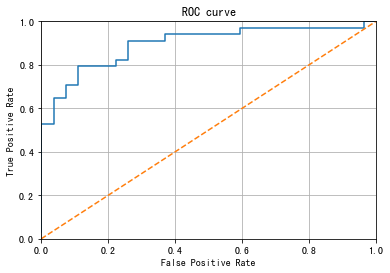

In [17]:
fpr, tpr, threshold = roc_curve(y_test, y_pre_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1], ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid(True)

In [18]:
auc(fpr,tpr)

0.8954248366013071

## The Explanation

In [20]:
import eli5

In [25]:
from eli5.sklearn import PermutationImportance

In [26]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

In [27]:
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


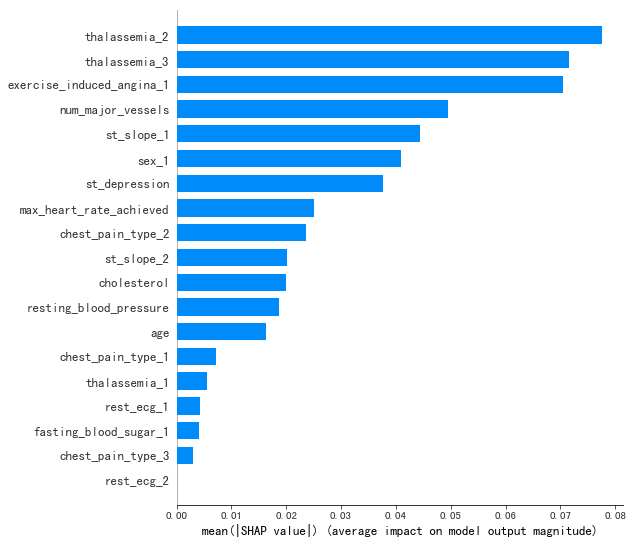

In [28]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

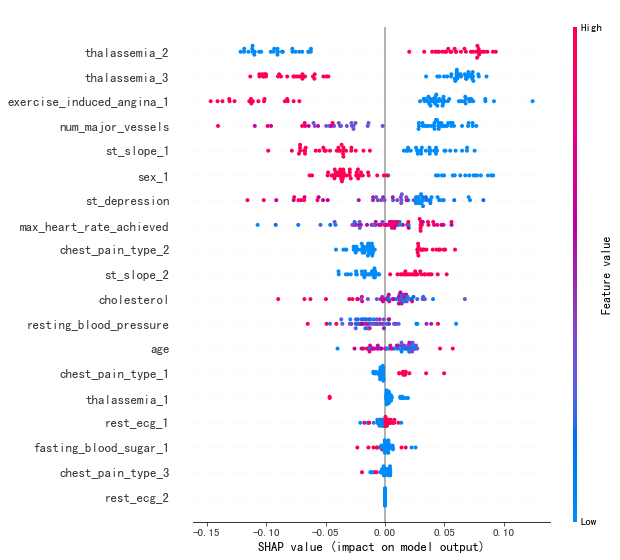

In [29]:
shap.summary_plot(shap_values[1], X_test)

In [31]:
shap.initjs()
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])